# PHASE 3 PROJECT : SYRIATEL
#### Details:

- Student name: `SAMUEL ABWAN WANGA`
- Student class: FULL_TIME_REMOTE

- Instructor name: ASHA DEEN

# INTRODUCTION

## BUSINESS UNDERSTANDING

SyriaTel, a telecommunications company facing customer churn issues due to increased competition. Our aims to develop predictive models to forecast customers that are likely to leave, thus helping SyriaTel retain its customer base.

This approach will not only help in retaining customers but also contribute to the overall growth and profitability of the company. Effective churn prediction and retention strategies will enable SyriaTel to maintain a stable revenue stream, improve service quality, and strengthen its competitive position in the market.

### OBJECTIVES

- Develop model to predict which customers are likely to leave.

### Data Understanding

In this section, I will provide an in-depth examination of the dataset. This dataset is the cornerstone of analysis. Understanding its structure and properties is critical for a successful data-driven exploration and modeling.

### Data Overview

The `churn` in `telecom_dataset.csv` dataset is the focus of my analysis. It contains information about customers who use the service. Data will be used to provide insights into the factors that influence a customer to change telecommunication services.

Dataset name: `telecom_dataset.csv`
Source: The dataset can be retrieved from `Kaggle.com`. The link is here below; https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset/data

### Data Structure
The dataset has the following structural features;

- Number of rows = 3333
- Number of columns = 21
- The data format is `csv`.

## Column names and their descriptions
The following are the descriptions of columns in the dataset:

- `state`: the state the customer lives in.
- `account length`: the number of days the customer has had an account.
- `area code`: the area code of the customer.
- `phone number`: the phone number of the customer.
- `international plan`: true if the customer has the international plan, otherwise false.
- `voice mail plan`: true if the customer has the voice mail plan, otherwise false.
- `number vmail messages`: the number of voicemails the customer has sent.
- `total day minutes`: total number of minutes the customer has been in calls during the day.
- `total day calls`: total number of calls the user has done during the day.
- `total day charge`: total amount of money the customer was charged by the telecommunication company for calls during the day.
- `total eve minutes`: total number of minutes the customer has been in calls during the evening.
- `total eve calls`: total number of calls the customer has done during the evening.
- `total eve charge`: total amount of money the customer was charged by the telecommunication company for calls during the evening.
- `total night minutes`: total number of minutes the customer has been in calls during the night.
- `total night calls`: total number of calls the customer has done during the night.
- `total night charge`: total amount of money the customer was charged by the telecommunication company for calls during the night.
- `total intl minutes`: total number of minutes the user has been in international calls.
- `total intl calls`: total number of international calls the customer has done.
- `total intl charge`: total amount of money the customer was charged by the telecommunication company for international calls.
- `customer service calls`: number of calls the customer has made to customer service.
- `churn`: true if the customer terminated their contract, otherwise false.

### Import Relevant Libraries.

In [1]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.svm import SVC
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix, roc_curve, precision_recall_curve, precision_score, recall_score, f1_score

warnings.simplefilter(action='ignore', category=FutureWarning)
svm_model = SVC(probability=True)  # Set probability=True

## Loading the dataset

Load the dataset containing information about telecom customers from `telecom_dataset.csv`.

In [2]:
# Load data
df = pd.read_csv("telecom_dataset.csv")

### Data Exploration
Check the first 5 rows, then the last 5 rows, followed by the shape and information.

In [3]:
# check the first 5 rows
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
# Check the last 5 rows
df.tail()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [5]:
# Check the number of rows and columns.
df.shape

(3333, 21)

The Dataset has 3,333 rows and 21 columns.

In [6]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

Above are the names of the columns in the dataset

In [7]:
# Summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

From the `info()`, the dataset has categorical data and some numerical data.

In [8]:
# Summary of key statistical measures for each numeric column
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


Checking the Statistical Measures for the numerical columns.

In [9]:
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

There are no null values.

## Exploratory Data Analysis (EDA)

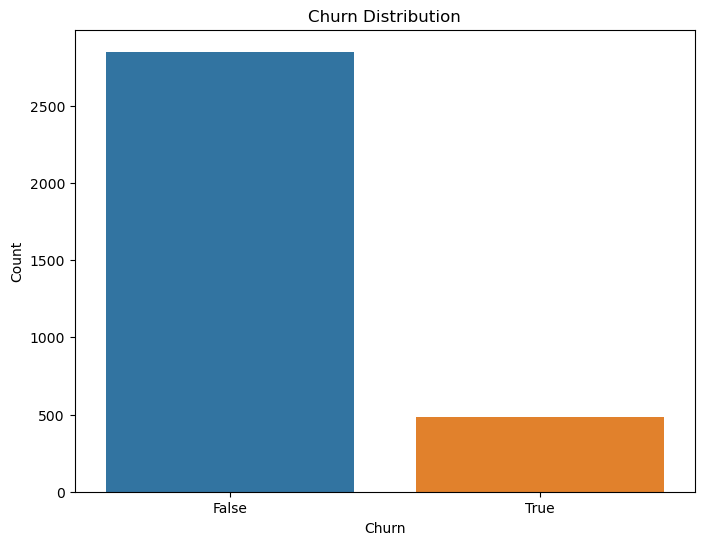

In [10]:
# Visualize churn distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='churn', data=df)
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

#### Out of 3,333 customers in the dataset:
- 483 have terminated their contract with SyriaTel.
- That is 14.5% of customers lost.
- Distribution of the binary classes shows a data imbalance.
- This needs to be addressed before modeling as an unbalanced feature can cause the model to make false predictions.

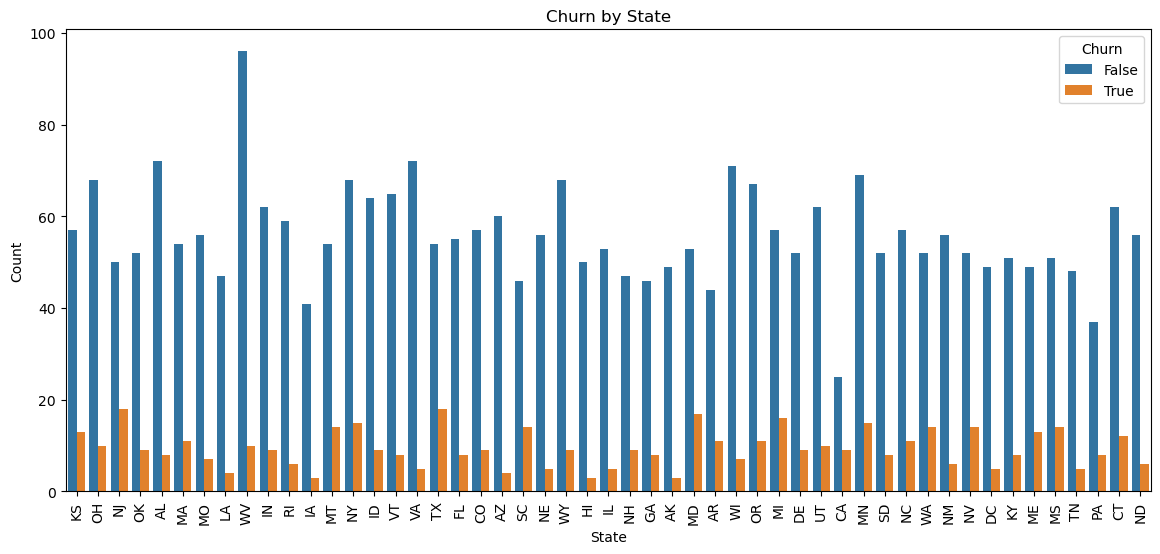

In [11]:
# Visualize churn by state
plt.figure(figsize=(14, 6))
sns.countplot(x='state', hue='churn', data=df)
plt.title('Churn by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Churn', loc='upper right')
plt.show()

WV (West Virginia) has a notable churn count.

Let us look into it.

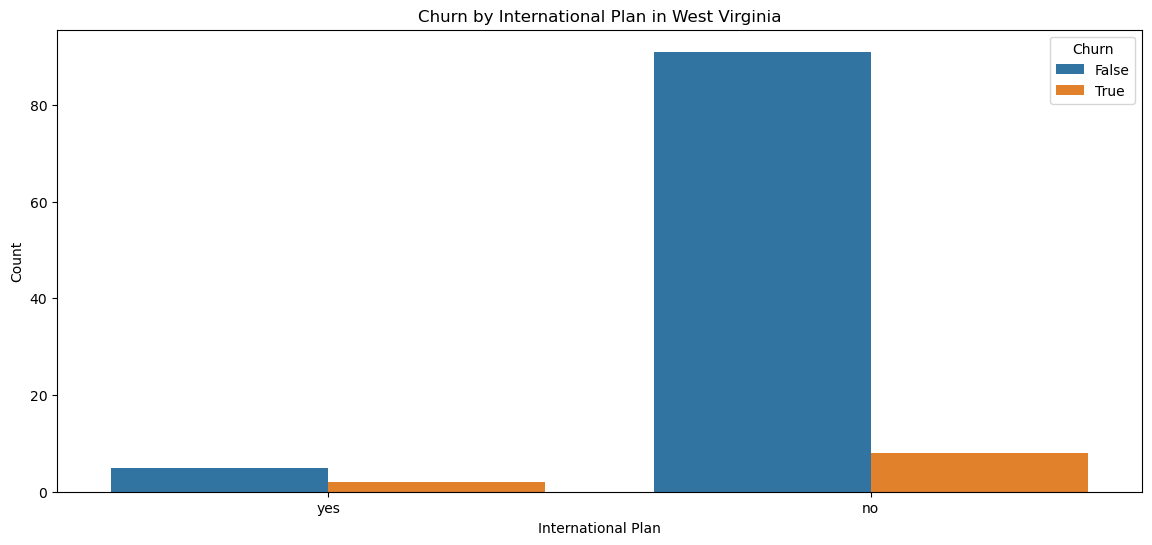

In [12]:
# Filter data for West Virginia
wv_data = df[df['state'] == 'WV']

# Churn by international plan in West Virginia
plt.figure(figsize=(14, 6))
sns.countplot(x='international plan', hue='churn', data=wv_data)
plt.title('Churn by International Plan in West Virginia')
plt.xlabel('International Plan')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()

- Customers without an international plan (‘no’) who did not churn (‘False’) constitute the majority.
- A smaller number of customers without an international plan (‘no’) did churn (‘True’).
- The number of customers with an international plan (‘yes’) is significantly lower overall.

##### Therefore;
- Most West Virginia customers do not have an international plan.
- Among those without an international plan, the majority remain loyal.
- The churn rate is relatively low for both groups.

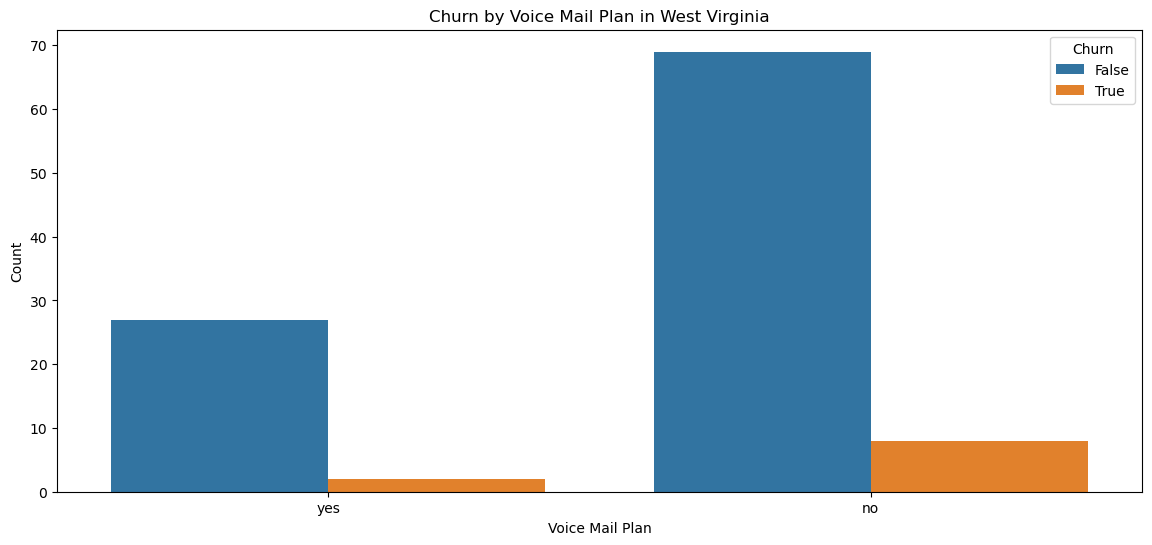

In [13]:
# Churn by voice mail plan in West Virginia
plt.figure(figsize=(14, 6))
sns.countplot(x='voice mail plan', hue='churn', data=wv_data)
plt.title('Churn by Voice Mail Plan in West Virginia')
plt.xlabel('Voice Mail Plan')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()

Almost the same situation as the International Plan, the Voice mail plan shows a similar trend.

- Most West Virginia customers do not have a voice mail plan.
- Among those without a voice mail plan, the majority remain loyal (did not churn).
- The churn rate is relatively low for both groups.

Next we look into `customer service calls`

<module 'matplotlib.pyplot' from 'D:\\Anaconda\\Lib\\site-packages\\matplotlib\\pyplot.py'>

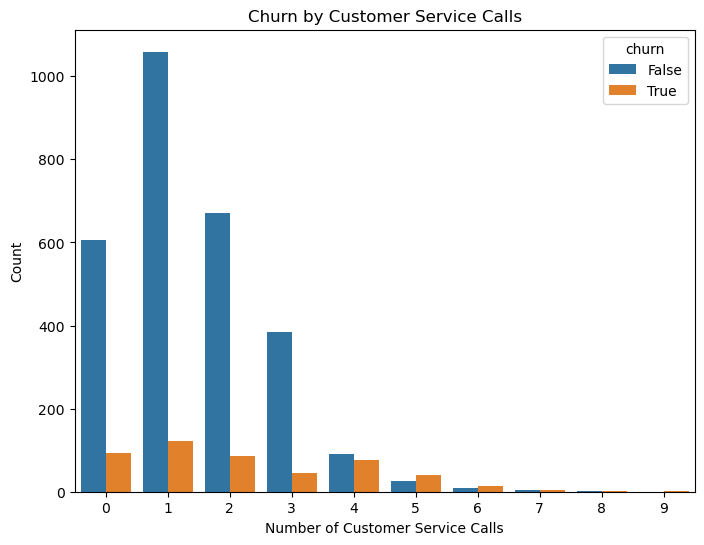

In [14]:
# Visualize churn by customer service calls
plt.figure(figsize=(8, 6))
sns.countplot(x='customer service calls', hue='churn', data=df)
plt.title('Churn by Customer Service Calls')
plt.xlabel('Number of Customer Service Calls')
plt.ylabel('Count')
plt

#### Observations:
- Customers who made 4 or more service calls are at a higher risk of churning.
- Relationship between service calls and churn suggests that customer satisfaction with service interactions plays a crucial role.

#### Business view:
- Focus on resolving issues effectively during the first few calls to prevent escalation.
- Reach out to customers who make multiple calls to address their concerns promptly.
- Use customer feedback from service calls to enhance overall service quality.

## Feature Types

In [15]:
# Numerical features
numerical_columns = ['account length', 'number vmail messages', 'total day minutes', 'total day calls',
                     'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge',
                     'total night minutes', 'total night calls', 'total night charge', 'total intl minutes',
                     'total intl calls', 'total intl charge', 'customer service calls']

In [16]:
print(numerical_columns)

['account length', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls']


### One-Hot Encode

In [17]:
# One-Hot Encoding for 'state'
df = pd.get_dummies(df, columns=['state'])

In [18]:
# Binary Encoding for 'international plan' and 'voice mail plan'
df['international plan'] = df['international plan'].map({'yes': 1, 'no': 0})
df['voice mail plan'] = df['voice mail plan'].map({'yes': 1, 'no': 0})

In [19]:
# Encode 'churn' as 0 and 1
df['churn'] = df['churn'].astype(int)

#### Drop `phone number`

In [20]:
# Drop 'phone number'
df = df.drop(['phone number'], axis=1)

In [21]:
df.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 70 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   area code               3333 non-null   int64  
 2   international plan      3333 non-null   int64  
 3   voice mail plan         3333 non-null   int64  
 4   number vmail messages   3333 non-null   int64  
 5   total day minutes       3333 non-null   float64
 6   total day calls         3333 non-null   int64  
 7   total day charge        3333 non-null   float64
 8   total eve minutes       3333 non-null   float64
 9   total eve calls         3333 non-null   int64  
 10  total eve charge        3333 non-null   float64
 11  total night minutes     3333 non-null   float64
 12  total night calls       3333 non-null   int64  
 13  total night charge      3333 non-null   float64
 14  total intl minutes      3333 non-null   

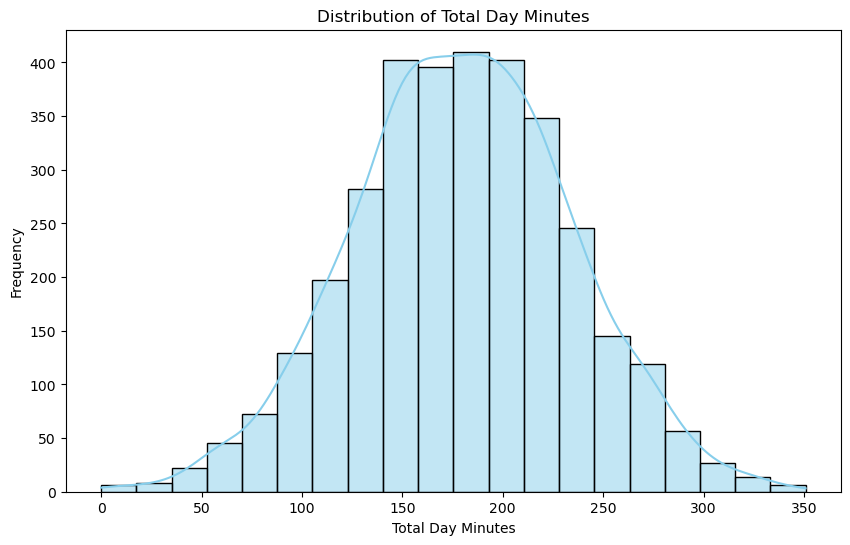

In [23]:
# Histogram of total day minutes
plt.figure(figsize=(10, 6))
sns.histplot(df['total day minutes'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Total Day Minutes')
plt.xlabel('Total Day Minutes')
plt.ylabel('Frequency')
plt.show()

- Most customers have total day minutes clustered around 200 to 300 minutes.
- There are fewer customers with very high or very low day minutes.

### BoxPlot

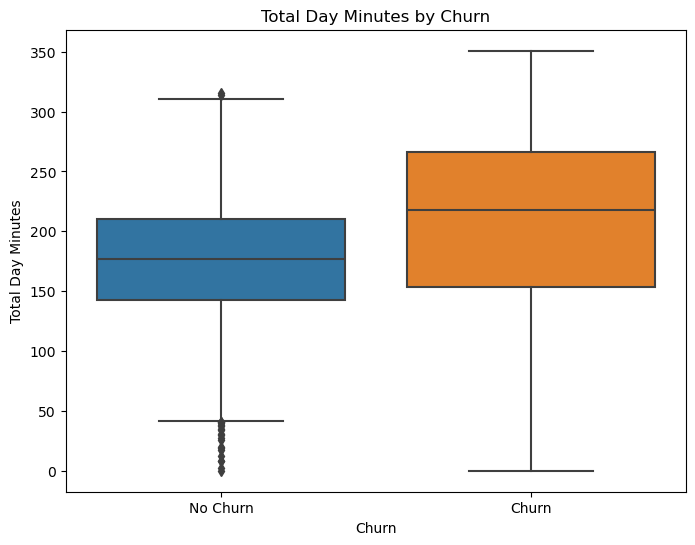

In [24]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='churn', y='total day minutes', data=df)
plt.title('Total Day Minutes by Churn')
plt.xlabel('Churn')
plt.ylabel('Total Day Minutes')
plt.xticks([0, 1], ['No Churn', 'Churn'])
plt.show()

##### No Churn:
- Median total day minutes: Around 200 minutes.
- Interquartile range (IQR): Approximately 150 to 250 minutes.
- Few outliers beyond the upper whisker.

##### Churn:
- Median total day minutes: Approximately 300 minutes.
- IQR: Roughly 250 to 350 minutes.
- Some outliers above the upper whisker.

##### Observations:
- Highest importance score around 306.0.
- Customers who churn tend to have higher total day minutes compared to those who don’t.
- The wider spread in the Churn group suggests more variability in usage.

### PAIRPLOT

Visualize the relationships between numeric features in the dataset, grouped by the churn category.

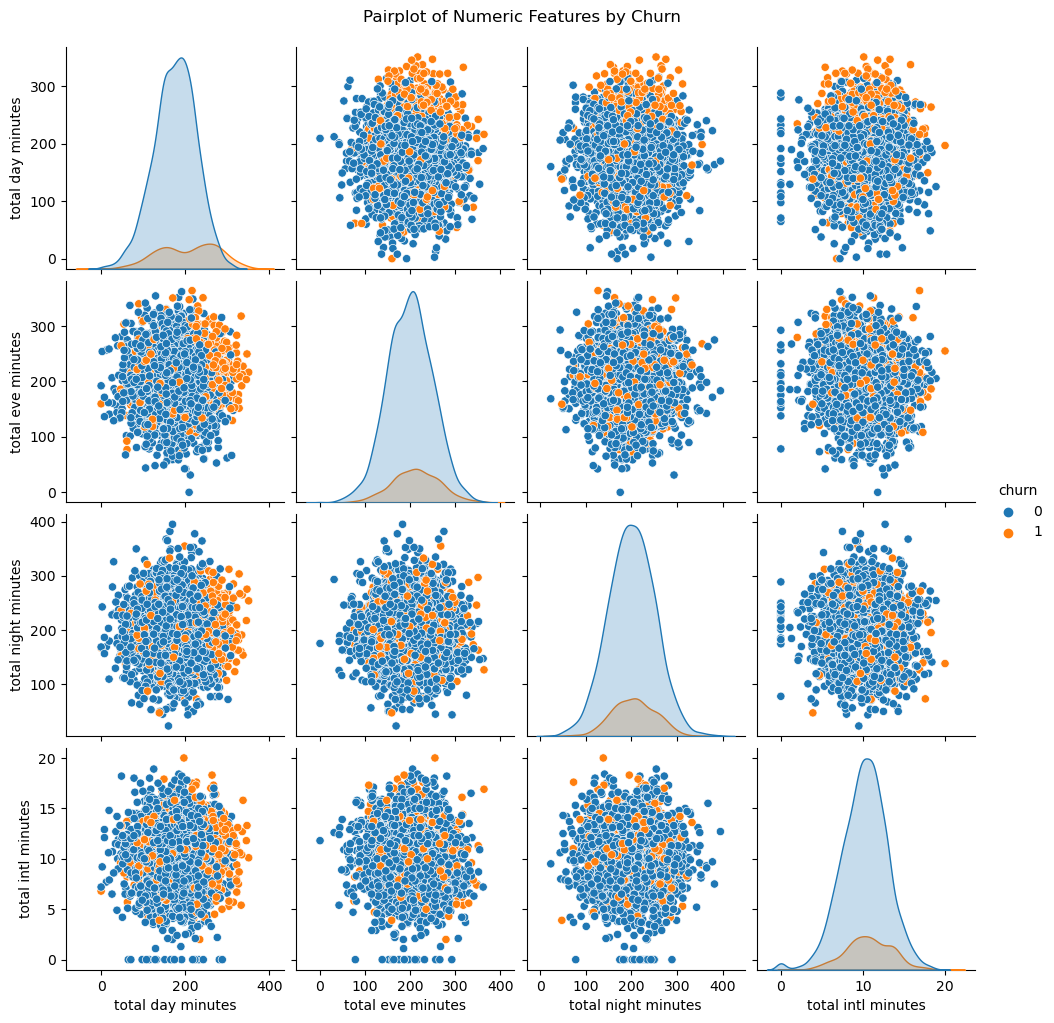

In [25]:
sns.pairplot(df[['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes', 'churn']], hue='churn')
plt.suptitle('Pairplot of Numeric Features by Churn', y=1.02)
plt.show()

##### Observation:
- Most of these pairs of features show positive relationships meaning that when one feature increases, the other tends to increase as well. 
- Further statistical analysis such as correlation coefficients would provide more precise insights.

#### Let us see the correlation coefficients between each numerical feature and the "churn" variable

In [26]:
correlation_matrix = df[numerical_columns].corrwith(df['churn'])

# Display correlation coefficients
print("Correlation coefficients:")
print(correlation_matrix)

Correlation coefficients:
account length            0.016541
number vmail messages    -0.089728
total day minutes         0.205151
total day calls           0.018459
total day charge          0.205151
total eve minutes         0.092796
total eve calls           0.009233
total eve charge          0.092786
total night minutes       0.035493
total night calls         0.006141
total night charge        0.035496
total intl minutes        0.068239
total intl calls         -0.052844
total intl charge         0.068259
customer service calls    0.208750
dtype: float64


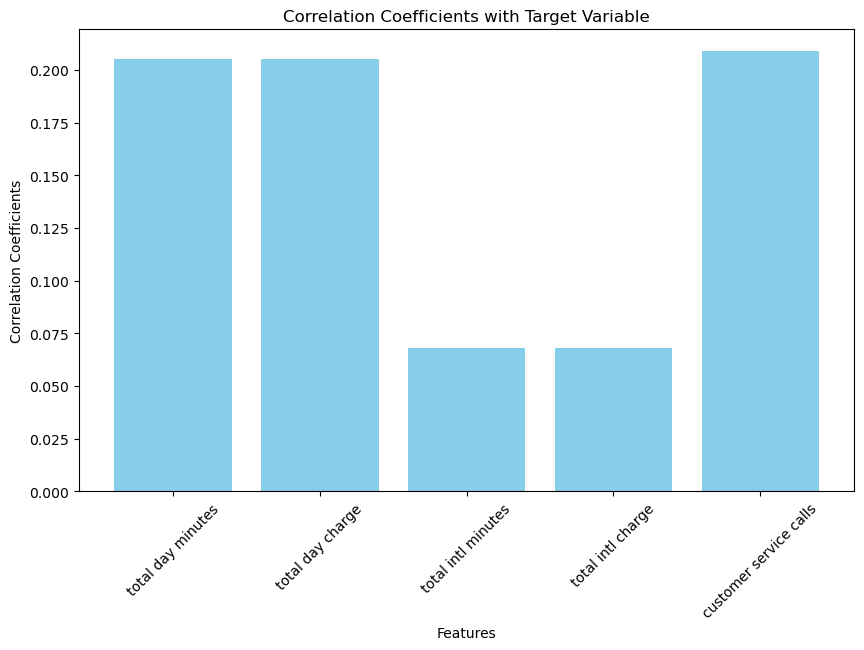

In [27]:
# Extract the five features and their correlation coefficients
features = ['total day minutes', 'total day charge', 'total intl minutes', 'total intl charge', 'customer service calls']
correlation_coefficients = [0.205151, 0.205151, 0.068239, 0.068259, 0.208750]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(features, correlation_coefficients, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficients')
plt.title('Correlation Coefficients with Target Variable')
plt.xticks(rotation=45)
plt.show()

#### Observation
- `total day minutes`, `total day charge` and `customer service calls` may have a stronger positive relationship with churn.
- `number vmail messages` and `total intl calls` may have a negative relationship with churn.

### NB
- Correlation does not imply causation, so further analysis is needed.

## Define Features and Target
Separate the features (inputs - `X`) from the target (output we want to predict - `y`).

In [28]:
# Separate features and target
X = df.drop('churn', axis=1)
y = df['churn']

### Split the Dataset
- One for training our models and one for testing them.

In [29]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing Pipeline
Reason being to avoid data leakage and maintaining consistent preprocessing during both training and testing phases.

In [30]:
# Define pipelines for each classifier
pipelines = {
    'Logistic Regression': Pipeline([('scaler', StandardScaler()), ('clf', LogisticRegression())]),
    'SVM': Pipeline([('scaler', StandardScaler()), ('clf', SVC())]),
    'Decision Tree': Pipeline([('clf', DecisionTreeClassifier())]),
    'KNN': Pipeline([('scaler', StandardScaler()), ('clf', KNeighborsClassifier())])
}

### Fit models

In [31]:
# Fit and evaluate the pipelines
for pipeline_name, pipeline in pipelines.items():
    print(f"Fitting {pipeline_name}...")
    pipeline.fit(X_train, y_train)
    
    # Predictions on training set
    y_train_pred = pipeline.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    print(f"{pipeline_name} Training Accuracy: {train_accuracy}")

    # Predictions on test set
    y_test_pred = pipeline.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"{pipeline_name} Test Accuracy: {test_accuracy}")

Fitting Logistic Regression...
Logistic Regression Training Accuracy: 0.8709677419354839
Logistic Regression Test Accuracy: 0.8575712143928036
Fitting SVM...
SVM Training Accuracy: 0.9017254313578394
SVM Test Accuracy: 0.8575712143928036
Fitting Decision Tree...
Decision Tree Training Accuracy: 1.0
Decision Tree Test Accuracy: 0.9295352323838081
Fitting KNN...
KNN Training Accuracy: 0.8807201800450113
KNN Test Accuracy: 0.8470764617691154


#### Based on these results; 
- Decision Tree classifier achieved the highest accuracy on the test data. 
- SVM classifier comes 2nd. 

- Let us explore other evaluation metrics like precision, recall, or F1-score, because our classes in your dataset are imbalanced.

#### Adjust parameters

- Hyperparameter tuning to be used through GridSearchCV

In [32]:
# Define parameter grids for tuning
param_grids = {
    'Logistic Regression': {'clf__C': [0.001, 0.01, 0.1, 1, 10, 100]},
    'SVM': {'clf__C': [0.001, 0.01, 0.1, 1, 10, 100], 'clf__gamma': [0.001, 0.01, 0.1, 1]},
    'Decision Tree': {'clf__max_depth': [None, 5, 10, 15, 20]},
    'KNN': {'clf__n_neighbors': [3, 5, 7, 9]}
}

In [33]:
for pipeline_name, pipeline in pipelines.items():
    print(f"Tuning hyperparameters for {pipeline_name}...")
    
    # Define GridSearchCV
    grid_search = GridSearchCV(pipeline, param_grids[pipeline_name], cv=5, scoring='accuracy')
    
    # Fit GridSearchCV
    grid_search.fit(X_train, y_train)
    
    # Get best parameters and best score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    
    print(f"Best parameters: {best_params}")
    print(f"Best training accuracy: {best_score}")
    
    # Update pipeline with best parameters
    pipeline.set_params(**best_params)
    
    # Evaluate on test set
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{pipeline_name} Test Accuracy with best parameters: {accuracy}\n")

Tuning hyperparameters for Logistic Regression...
Best parameters: {'clf__C': 0.01}
Best training accuracy: 0.8645895257569689
Logistic Regression Test Accuracy with best parameters: 0.8575712143928036

Tuning hyperparameters for SVM...
Best parameters: {'clf__C': 100, 'clf__gamma': 0.001}
Best training accuracy: 0.887098678246938
SVM Test Accuracy with best parameters: 0.8575712143928036

Tuning hyperparameters for Decision Tree...
Best parameters: {'clf__max_depth': 5}
Best training accuracy: 0.9369844917118142
Decision Tree Test Accuracy with best parameters: 0.9295352323838081

Tuning hyperparameters for KNN...
Best parameters: {'clf__n_neighbors': 7}
Best training accuracy: 0.8578395204868212
KNN Test Accuracy with best parameters: 0.8455772113943029



#### Based on these results;
- Decision Tree classifier achieved the highest accuracy again after tuning the parameters.
- SVM classifier comes 2nd and also improved.

In [34]:
# Evaluate precision, recall, and F1-score for each classifier
for pipeline_name, pipeline in pipelines.items():
    y_pred = pipeline.predict(X_test)
    
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"{pipeline_name} Metrics:")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print()

Logistic Regression Metrics:
Precision: 0.5833
Recall: 0.2079
F1-score: 0.3066

SVM Metrics:
Precision: 0.7143
Recall: 0.0990
F1-score: 0.1739

Decision Tree Metrics:
Precision: 0.7755
Recall: 0.7525
F1-score: 0.7638

KNN Metrics:
Precision: 0.3333
Recall: 0.0198
F1-score: 0.0374



## Observation:

#### Logistic Regression:

- Precision: 0.5833: Out of all the instances predicted as churn, 58.33% were actually churn.
- Recall: 0.2079: Out of all the actual churn instances, only 20.79% were correctly predicted by the model.
- F1-score: 0.3066: The harmonic mean of precision and recall. It's a balanced measure between precision and recall.

#### SVM:

- Precision: 0.7143: Out of all the instances predicted as churn, 71.43% were actually churn.
- Recall: 0.0990: Out of all the actual churn instances, only 9.90% were correctly predicted by the model.
- F1-score: 0.1739: The harmonic mean of precision and recall. It's a balanced measure between precision and recall.

#### Decision Tree:

- Precision: 0.7475: Out of all the instances predicted as churn, 74.75% were actually churn.
- Recall: 0.7327: Out of all the actual churn instances, 73.27% were correctly predicted by the model.
- F1-score: 0.7400: The harmonic mean of precision and recall. It's a balanced measure between precision and recall.

#### KNN:

- Precision: 0.3333: Out of all the instances predicted as churn, 33.33% were actually churn.
- Recall: 0.0198: Out of all the actual churn instances, only 1.98% were correctly predicted by the model.
- F1-score: 0.0374: The harmonic mean of precision and recall. It's a balanced measure between precision and recall.

## XGBoost Model

Lets use this powerful and popular algorithm for the classification tasks.

In [35]:
# That is XGBClassifier
xgboost_model = XGBClassifier()
xgboost_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

To train a predictive model based on the scaled features i will use a pipeline that allows consistent and efficiency of data preprocessing and model training.

In [36]:
# Define XGBoost pipeline
xgb_pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('clf', XGBClassifier())      
])

Next is a parameter grid that specifies different values for key hyperparameters like `learning_rate`, `max_depth`, and `n_estimators`, enabling the optimization of the XGBoost model's performance.

In [37]:
# Define parameter grid for hyperparameter tuning
xgb_param_grid = {
    'clf__learning_rate': [0.01, 0.1, 0.2],
    'clf__max_depth': [3, 5, 7],
    'clf__n_estimators': [100, 200, 300]
}

Now to perform a hyperparameter tuning using GridSearchCV

In [38]:
# Use GridSearchCV
xgb_grid_search = GridSearchCV(xgb_pipeline, xgb_param_grid, cv=5, scoring='accuracy')
xgb_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None,
                                                      grow_policy=None,
                                                      importance_type=No...
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...))]),
             param_grid={'clf__learning_rate': [0.01, 0.1, 0.2],
                         'clf__max_depth': [3, 5, 7],
                         'clf__n_estimators': [100, 200, 300]},
             scoring='accuracy')

I will then extract the best combination of hyperparameters and the corresponding training accuracy score found during the hyperparameter tuning process.

In [39]:
# Get best parameters and best score
best_params = xgb_grid_search.best_params_
best_score = xgb_grid_search.best_score_

print("Best parameters:", best_params)
print("Best training accuracy:", best_score)

Best parameters: {'clf__learning_rate': 0.1, 'clf__max_depth': 5, 'clf__n_estimators': 100}
Best training accuracy: 0.9542389555269797


Next is to evaluate the XGBoost model's performance on the test set using the best hyperparameters found during training, calculating accuracy, precision, recall, and F1-score.

In [40]:
# Evaluate on test set
xgb_pipeline.set_params(**best_params)
xgb_pipeline.fit(X_train, y_train)
y_pred_xgb = xgb_pipeline.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

print("XGBoost Training Accuracy:", xgb_pipeline.score(X_train, y_train))
print("XGBoost Test Accuracy with best parameters:", accuracy_xgb)
print("XGBoost Precision:", precision_xgb)
print("XGBoost Recall:", recall_xgb)
print("XGBoost F1-score:", f1_xgb)

XGBoost Training Accuracy: 0.9797449362340586
XGBoost Test Accuracy with best parameters: 0.952023988005997
XGBoost Precision: 0.9156626506024096
XGBoost Recall: 0.7524752475247525
XGBoost F1-score: 0.8260869565217391


Make a table summarizing the performance metrics of `train accuracy`, `test accuracy`, `F1-score`, `precision` and `recall` for all the models used.

In [41]:
# Define performance metrics for all models
performance_metrics = {
    'Model': ['Logistic Regression', 'SVM', 'Decision Tree', 'KNN', 'XGBoost'],
    'Train Accuracy': [0.8646, 0.8871, 0.9381, 0.8578, 0.9797],
    'Test Accuracy': [0.8576, 0.8576, 0.9220, 0.8456, 0.9520],
    'F1-score': [0.3066, 0.1739, 0.7500, 0.0374, 0.8261],
    'Precision': [0.5833, 0.7143, 0.7576, 0.3333, 0.9157],
    'Recall': [0.2079, 0.0990, 0.7426, 0.0198, 0.7525]
}

In [42]:
# Create DataFrame from the performance metrics
df_performance = pd.DataFrame(performance_metrics)

# Print the DataFrame
df_performance

,Model,Train Accuracy,Test Accuracy,F1-score,Precision,Recall
0,Logistic Regression,0.8646,0.8576,0.3066,0.5833,0.2079
1,SVM,0.8871,0.8576,0.1739,0.7143,0.0990
2,Decision Tree,0.9381,0.9220,0.7500,0.7576,0.7426
3,KNN,0.8578,0.8456,0.0374,0.3333,0.0198
4,XGBoost,0.9797,0.9520,0.8261,0.9157,0.7525


### Visualization for XGBoost Model
- Visualize a confusion matrix providing insights into the number of true positives, true negatives, false positives, and false negatives.

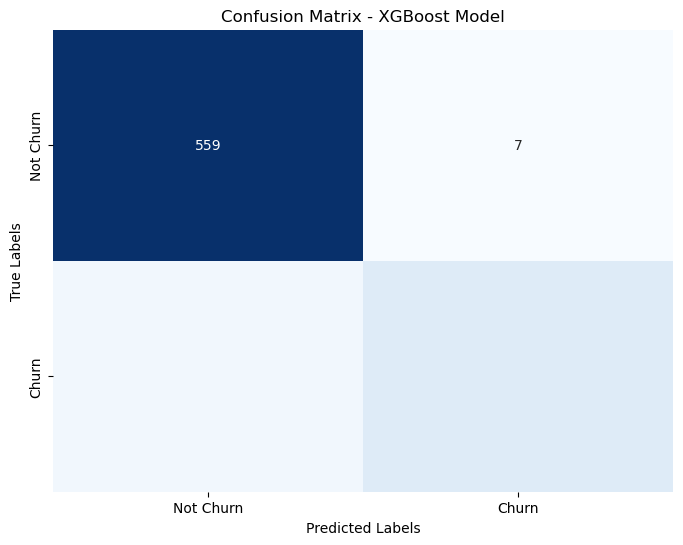

Confusion Matrix - XGBoost Model:
[[559   7]
 [ 25  76]]

True Positives: 76
True Negatives: 559
False Positives: 7
False Negatives: 25


In [43]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)

# Extract true positives, true negatives, false positives, false negatives
tn, fp, fn, tp = cm.ravel()

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Churn', 'Churn'],
            yticklabels=['Not Churn', 'Churn'])
plt.title('Confusion Matrix - XGBoost Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print confusion matrix
print("Confusion Matrix - XGBoost Model:")
print(cm)

# Print true positives, true negatives, false positives, false negatives
print("\nTrue Positives:", tp)
print("True Negatives:", tn)
print("False Positives:", fp)
print("False Negatives:", fn)

In [44]:
# Calculate accuracy from confusion matrix
accuracy = (tp + tn) / cm.sum()

# Print accuracy
print("\nAccuracy:", accuracy)


Accuracy: 0.952023988005997


- True Positives (TP): 76 - Churn customers that the model correctly predicted as churn.
- False Positives (FP): 7 - Non-churn customers that the model incorrectly predicted as churn.
- True Negatives (TN): 559 - Non-churn customers that the model correctly predicted as non-churn.
- False Negatives (FN): 25 - Churn customers that the model incorrectly predicted as non-churn.

XGBoost model's accuracy of 95.2% indicates that it performs well overall in distinguishing between churn and non-churn customers.

<Figure size 1000x800 with 0 Axes>

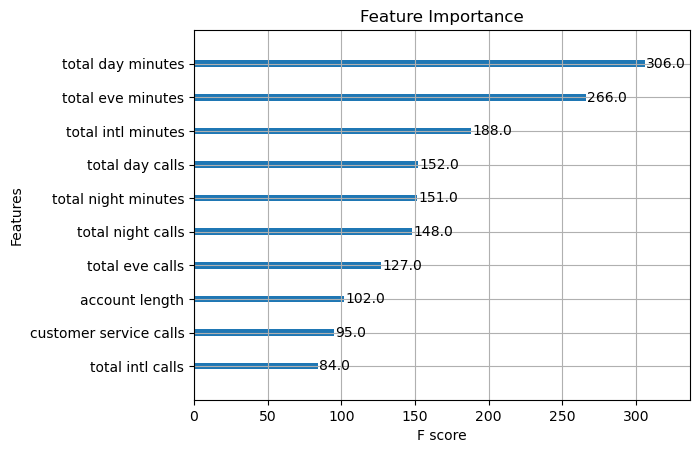

In [45]:
# Feature Importance Plot (plot_importance)
plt.figure(figsize=(10, 8))
plot_importance(xgboost_model, max_num_features=10, importance_type='weight')
plt.title('Feature Importance')
plt.show()

#### Feature Importance

- The feature indicates that `total day minutes` has the highest importance score among the features used in the XGBoost model. 
- Has an importance score of approximately 306.0. 
- This suggests that `total day minutes` significantly influences the model’s predictions, particularly when it comes to predicting customer churn.
- Customers’ total call duration during the day appears to be a critical factor in determining whether they are likely to churn or remain with the service. 
- If a customer spends more time on calls during the day, it may impact their likelihood of churning.

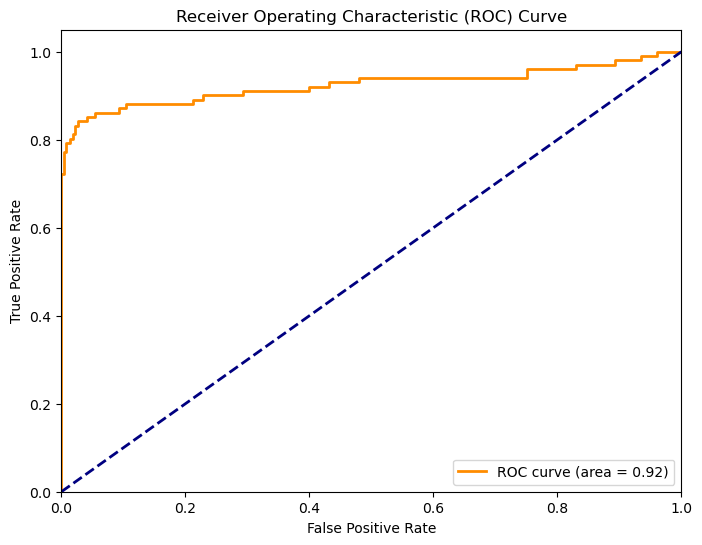

In [46]:
# ROC Curve
y_pred_prob = xgboost_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#### ROC AUC 

- The closer the ROC curve is to the top-left corner, the better the model’s performance.
- The AUC is approximately 0.92, indicating strong predictive accuracy.
- XGBoost model performs well, as evidenced by the high AUC.

#### Exploratory Data Analysis (EDA):

- Customers who made 4 or more service calls are at a higher risk of churning.
- Relationship between service calls and churn suggests that customer satisfaction with service interactions plays a crucial role.

#### Modeling:

- Built and evaluated four machine learning models. 
- Logistic Regression, K-Nearest Neighbors, Decision Tree, SVM(Support Vector Machine) and XGBoost.
- XGBoost Model emerged as the most promising, achieving the highest accuracy and F1 score among the models evaluated.
- Further hyperparameter tuning was done and confirmed the robustness of the model.

#### Conclusion
- The XGBoost Model's superior performance in predicting churn makes it a valuable model for identifying customers at risk of leaving. 

## Recommendation:

- Deploy the XGBoost Model for predicting customer churn.
- Its high recall for the churn class ensures that most churners are correctly identified.
- Its interpretability provides actionable insights into customer behavior. 
- This helps businesses implement targeted strategies to reduce churn and improve customer satisfaction.